2016

DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/RunIISummer16MiniAODv2-PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1

In [175]:
import ROOT
import numpy as np
import uproot
import pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [176]:
root_file = '/eos/user/m/mkovac/Data/DY_2016_1_6_2019/train.root'
tree = uproot.open(root_file)["ntuplizer/tree"]
# df = tree.pandas.df(set(['mu_pT', 'mu_eta', 'mu_ip', 'mu_sip', 'mu_dz', 'mu_dxy']), entrystop = 1000000)
df = tree.pandas.df(entrystop = 1000000)

In [177]:
df["Muon_ISO"] = (df["mu_pf_charged_had_iso"] + np.clip(df["mu_pf_neutral_had_iso"] + df["mu_pf_photon_iso"] - 0.5*df["mu_pu_charged_had_iso"], 0, None))/df["mu_pT"]

In [227]:
df = df.query('mu_pT < 10 and (is_tracker_mu or is_global_mu)')
df_dxy_dz = df.query('mu_dz < 1 and mu_dxy < 0.5')
df_signal = df.query('matchedToGenMu == 1')
df_signal_from_Z = df.query('matchedToGenMu == 1 and n_muons == 2')
df_signal_dxy_dz = df_signal.query('mu_dz < 1 and mu_dxy < 0.5')
df_signal_from_Z_dxy_dz = df_signal_from_Z.query('mu_dz < 1 and mu_dxy < 0.5')
df.head(10)

,nEvent,nRun,nLumi,n_muons,genNpu,vtxN,mu_Q,mu_pT,mu_eta,mu_phi,...,mu_pf_charged_had_iso,mu_pf_neutral_had_iso,mu_pf_photon_iso,mu_pu_charged_had_iso,mu_rho,mu_dR,matchedToGenMu,matchedToGenMuPOG,matchedToGenMu_POG_codes,Muon_ISO
entry,,,,,,,,,,,,,,,,,,,,,
25,131493977,1,276733,1,17,16,1.0,5.688053,-1.807833,-0.496144,...,0.000000,0.000000,3.005106,7.400858,16.941254,0.000218,2,999,3,0.000000
27,131493985,1,276733,1,15,15,-1.0,6.322598,-0.222334,-2.849277,...,0.000000,0.000000,6.805917,0.688046,14.604653,999.000000,0,999,0,1.022031
51,131494069,1,276733,1,23,19,1.0,5.581814,-2.117182,2.718894,...,6.224681,0.000000,2.356920,2.948176,15.029577,999.000000,0,999,0,1.273334
56,131494087,1,276733,1,20,14,1.0,7.877994,0.641724,0.528248,...,1.785512,8.298699,0.000000,0.969635,10.221614,999.000000,0,999,0,1.218507
60,131494119,1,276733,1,28,19,-1.0,9.917766,1.753689,-0.949402,...,4.646638,0.772886,3.999237,26.822746,14.383623,999.000000,0,999,0,0.468517
100,131494295,1,276733,1,10,12,-1.0,5.833405,0.010139,-1.767273,...,0.000000,0.000000,0.000000,0.820029,4.998518,0.001898,2,999,3,0.000000
108,131494323,1,276733,3,12,11,1.0,6.993244,1.749212,-2.003184,...,38.539787,0.578307,0.000000,5.722849,9.951802,0.991779,0,999,0,5.511003
115,131494374,1,276734,1,24,19,1.0,5.335313,-0.849432,1.252127,...,0.000000,1.846875,0.000000,6.678253,13.108842,0.000497,2,999,3,0.000000
118,131494391,1,276734,1,25,20,-1.0,5.201190,2.116047,2.565033,...,3.567515,0.000000,0.000000,0.647386,14.640393,0.000272,3,999,2,0.685904


Text(0.5,0,'Muon SIP')

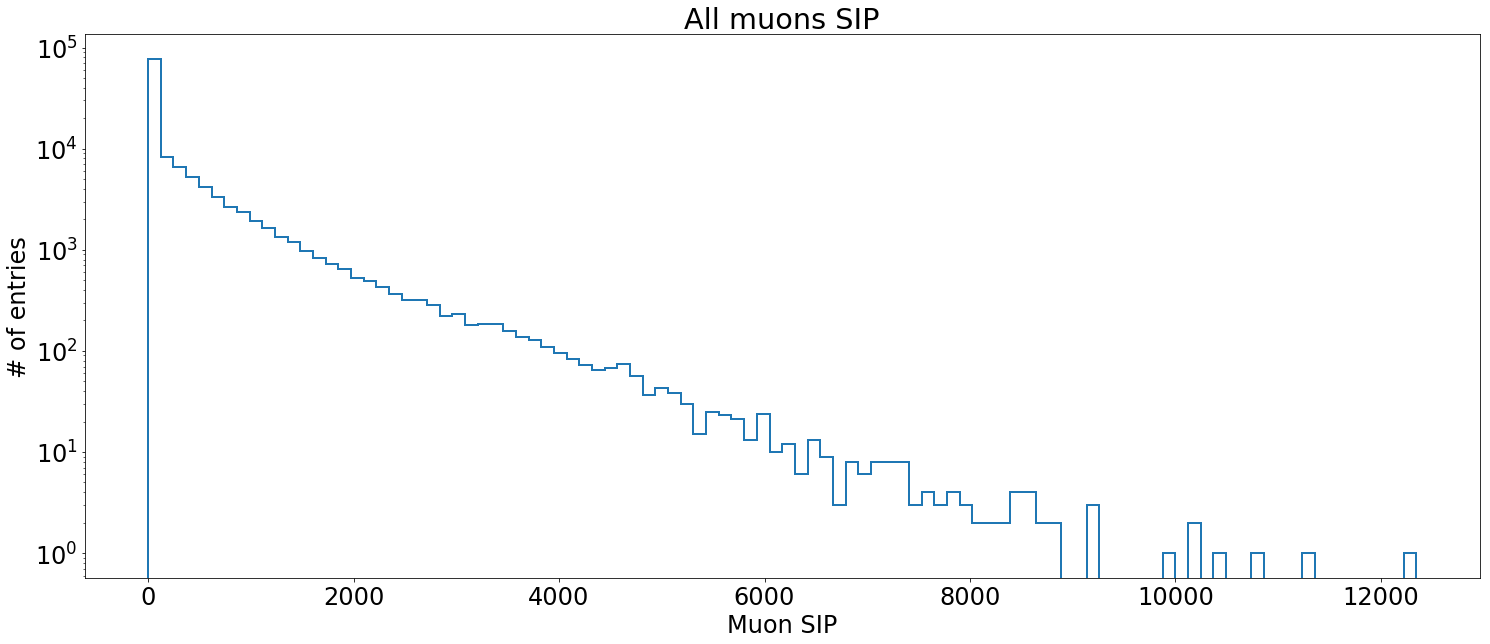

In [202]:
# bins = np.linspace(0, 1000, 100)
plt.figure(figsize = (25,10))
plt.hist(df['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('All muons SIP')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

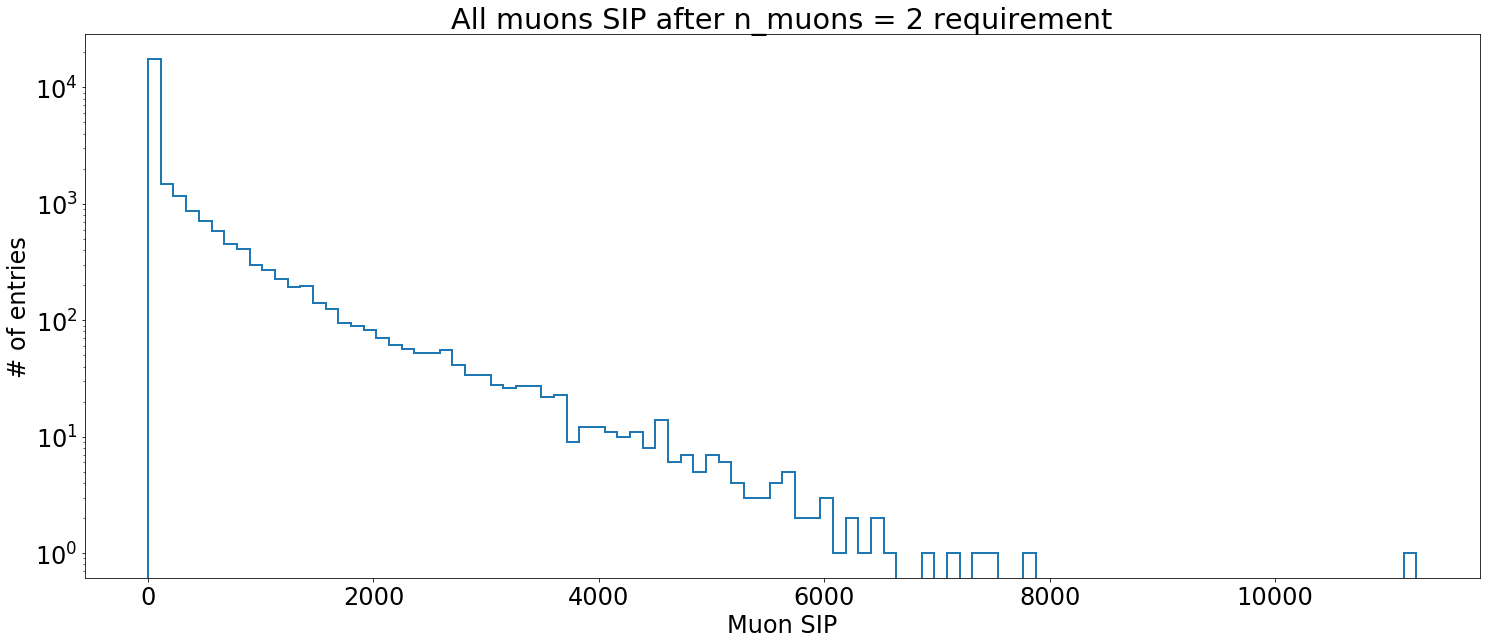

In [206]:
plt.figure(figsize = (25,10))
plt.hist(df.query('n_muons == 2')['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('All muons SIP after n_muons = 2 requirement')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

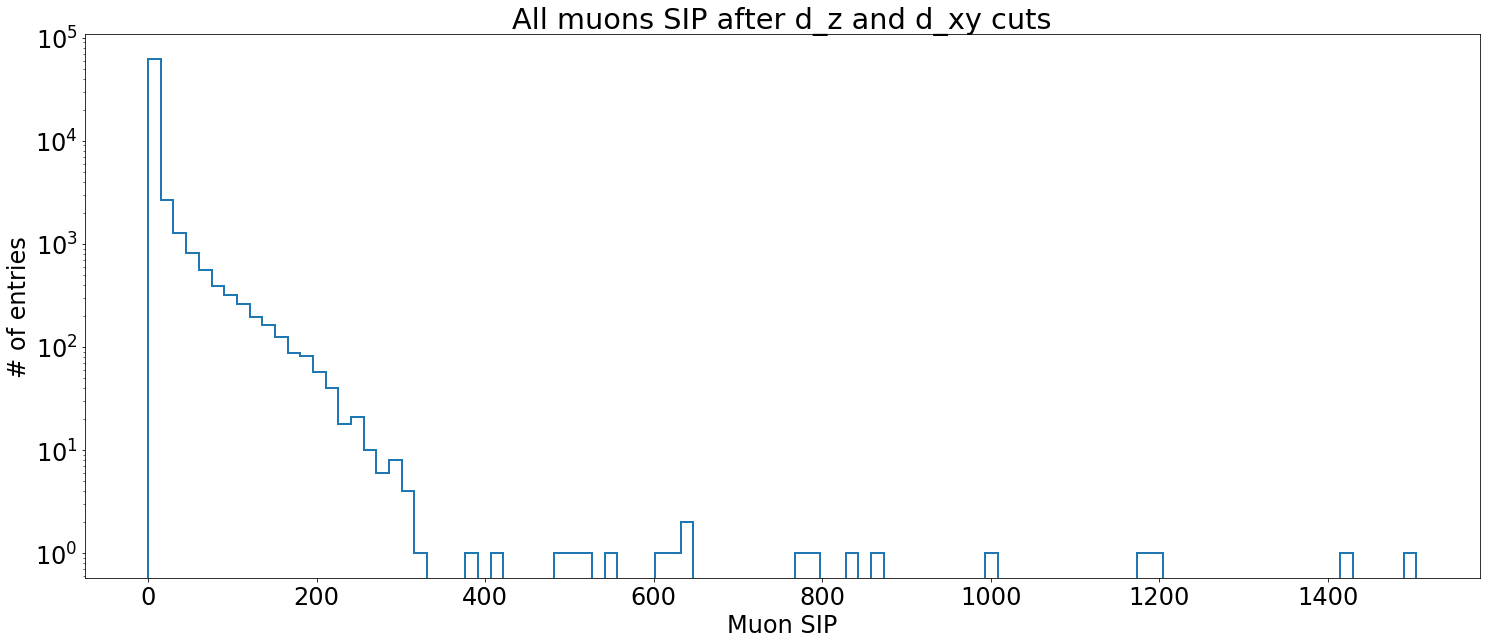

In [204]:
plt.figure(figsize = (25,10))
plt.hist(df_dxy_dz['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('All muons SIP after d_z and d_xy cuts')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

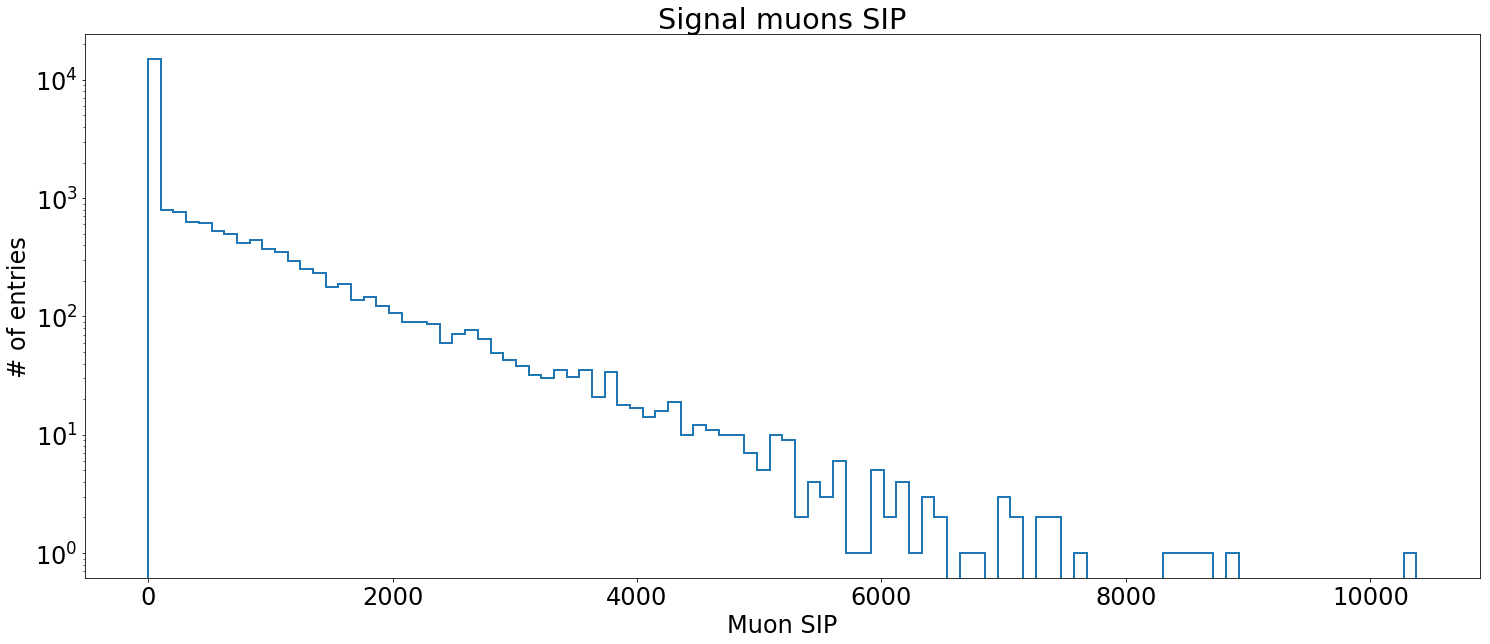

In [203]:
plt.figure(figsize = (25,10))
plt.hist(df_signal['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.title('Signal muons SIP')
plt.yscale('log')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

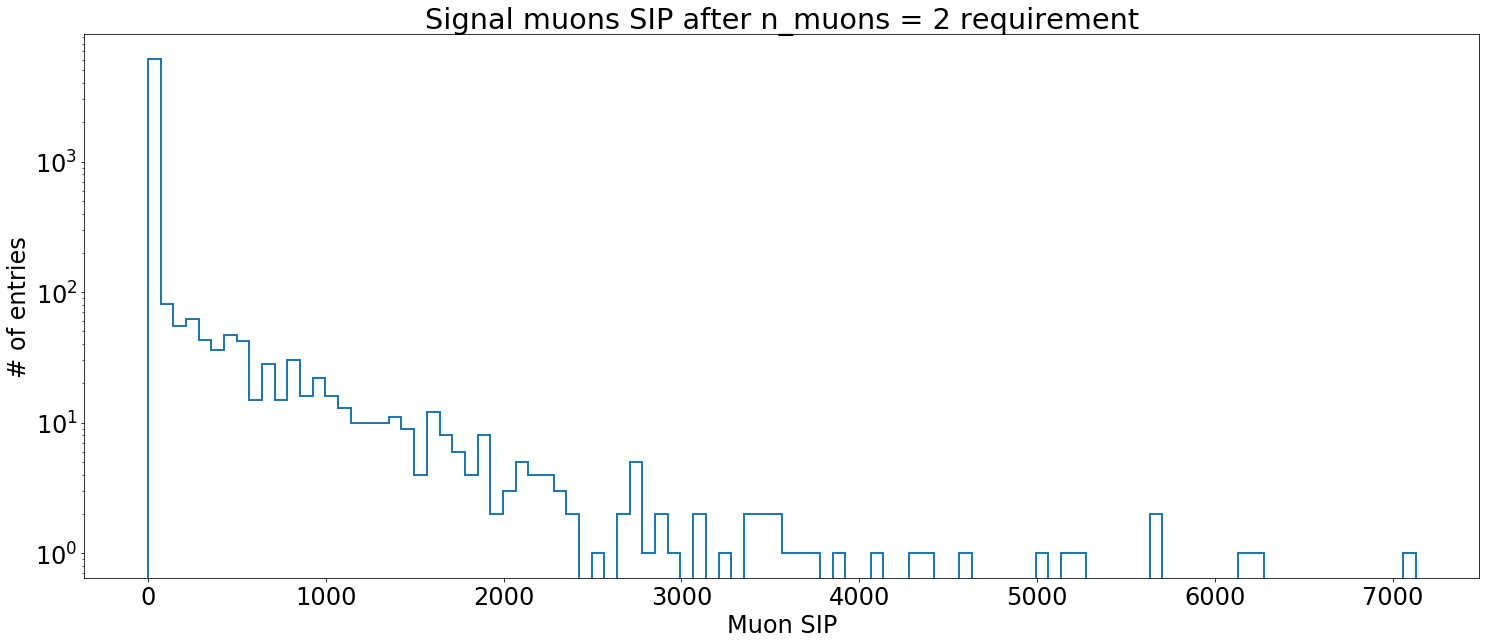

In [231]:
plt.figure(figsize = (25,10))
plt.hist(df_signal_from_Z['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('Signal muons SIP after n_muons = 2 requirement')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

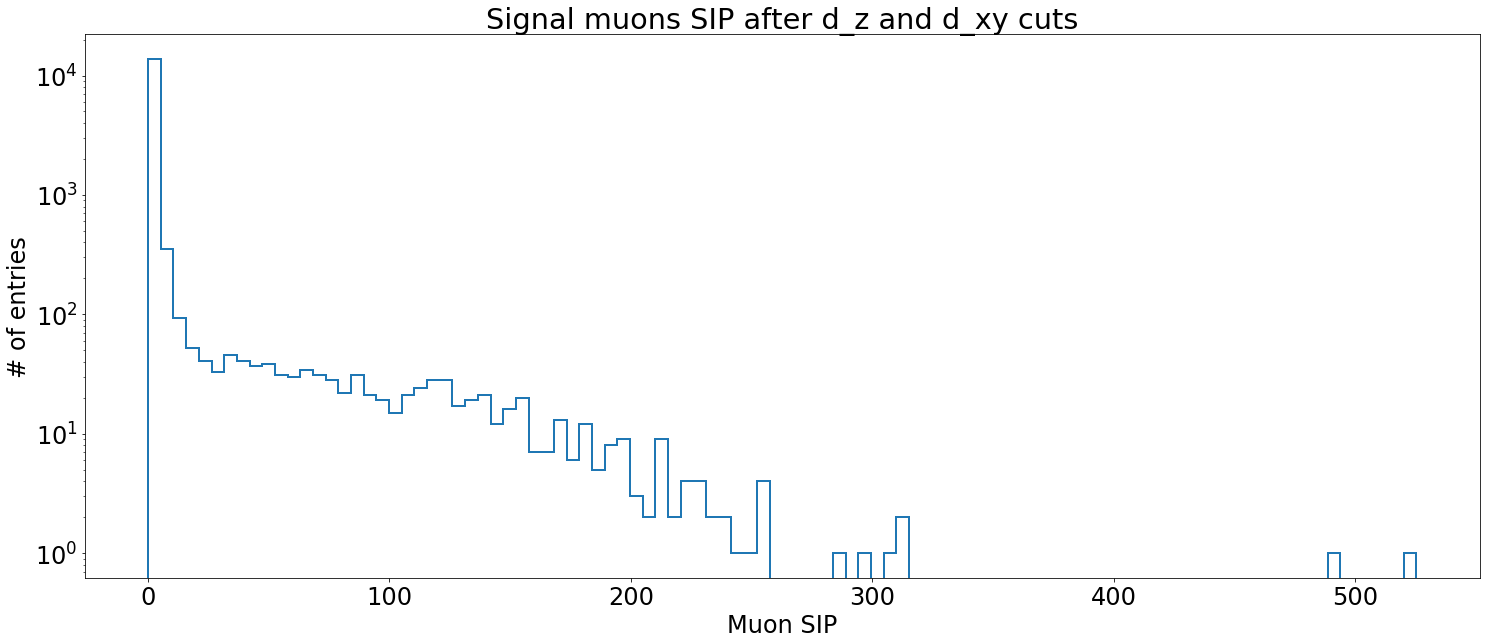

In [205]:
plt.figure(figsize = (25,10))
plt.hist(df_signal_dxy_dz['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('Signal muons SIP after d_z and d_xy cuts')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Efficiencies

In [184]:
print len(df_signal_dxy_dz.query('mu_sip < 4'))*1./len(df_signal_dxy_dz)*100

89.345348529


Signal efficiency

In [222]:
sig_passing_ID_cut = df_signal.query("is_pf_mu == 1")
sig_passing_ID_ISO_cut = sig_passing_ID_cut.query("Muon_ISO < 0.35")
sig_passing_ID_ISO_SIP_cut = sig_passing_ID_ISO_cut.query("mu_sip < 4")
sig_passing_ID_SIP_cut = sig_passing_ID_cut.query("mu_sip < 4")
sig_passing_ID_SIP_ISO_cut = sig_passing_ID_SIP_cut.query("Muon_ISO < 0.35")

print("Total ID eff.         = {0}").format(len(sig_passing_ID_cut)*1./len(df_signal)*100)
print("Total ID+ISO+SIP eff. = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(df_signal)*100)
print("Total ID+SIP+ISO eff. = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(df_signal)*100)
print
print("ISO eff. after ID     = {0}").format(len(sig_passing_ID_ISO_cut)*1./len(sig_passing_ID_cut)*100)
print("SIP eff. after ID+ISO = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(sig_passing_ID_ISO_cut)*100)
print("SIP eff. after ID     = {0}").format(len(sig_passing_ID_SIP_cut)*1./len(sig_passing_ID_cut)*100)
print("ISO eff. after ID+SIP = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(sig_passing_ID_SIP_cut)*100)

Total ID eff.         = 99.1507156406
Total ID+ISO+SIP eff. = 48.0858768753
Total ID+SIP+ISO eff. = 48.0858768753

ISO eff. after ID     = 83.7732075308
SIP eff. after ID+ISO = 57.891731977
SIP eff. after ID     = 58.4764554981
ISO eff. after ID+SIP = 82.9355342405


Signal efficiency where signal muons are coming from events containing only 2 muons

In [220]:
sig_passing_ID_cut = df_signal_from_Z.query("is_pf_mu == 1")
sig_passing_ID_ISO_cut = sig_passing_ID_cut.query("Muon_ISO < 0.35")
sig_passing_ID_ISO_SIP_cut = sig_passing_ID_ISO_cut.query("mu_sip < 4")
sig_passing_ID_SIP_cut = sig_passing_ID_cut.query("mu_sip < 4")
sig_passing_ID_SIP_ISO_cut = sig_passing_ID_SIP_cut.query("Muon_ISO < 0.35")

print("Total ID eff.         = {0}").format(len(sig_passing_ID_cut)*1./len(df_signal_from_Z)*100)
print("Total ID+ISO+SIP eff. = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(df_signal_from_Z)*100)
print("Total ID+SIP+ISO eff. = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(df_signal_from_Z)*100)
print
print("ISO eff. after ID     = {0}").format(len(sig_passing_ID_ISO_cut)*1./len(sig_passing_ID_cut)*100)
print("SIP eff. after ID+ISO = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(sig_passing_ID_ISO_cut)*100)
print("SIP eff. after ID     = {0}").format(len(sig_passing_ID_SIP_cut)*1./len(sig_passing_ID_cut)*100)
print("ISO eff. after ID+SIP = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(sig_passing_ID_SIP_cut)*100)

Total ID eff.         = 99.3091283257
Total ID+ISO+SIP eff. = 66.2207849478
Total ID+SIP+ISO eff. = 66.2207849478

ISO eff. after ID     = 80.7874481942
SIP eff. after ID+ISO = 82.5393917186
SIP eff. after ID     = 82.9336885731
ISO eff. after ID+SIP = 80.4033553454


Signal efficiency where signal muons have already passed d_z and d_xy cuts

In [229]:
sig_passing_ID_cut = df_signal_dxy_dz.query("is_pf_mu == 1")
sig_passing_ID_ISO_cut = sig_passing_ID_cut.query("Muon_ISO < 0.35")
sig_passing_ID_ISO_SIP_cut = sig_passing_ID_ISO_cut.query("mu_sip < 4")
sig_passing_ID_SIP_cut = sig_passing_ID_cut.query("mu_sip < 4")
sig_passing_ID_SIP_ISO_cut = sig_passing_ID_SIP_cut.query("Muon_ISO < 0.35")

print("Total ID eff.         = {0}").format(len(sig_passing_ID_cut)*1./len(df_signal_dxy_dz)*100)
print("Total ID+ISO+SIP eff. = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(df_signal_dxy_dz)*100)
print("Total ID+SIP+ISO eff. = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(df_signal_dxy_dz)*100)
print
print("ISO eff. after ID     = {0}").format(len(sig_passing_ID_ISO_cut)*1./len(sig_passing_ID_cut)*100)
print("SIP eff. after ID+ISO = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(sig_passing_ID_ISO_cut)*100)
print("SIP eff. after ID     = {0}").format(len(sig_passing_ID_SIP_cut)*1./len(sig_passing_ID_cut)*100)
print("ISO eff. after ID+SIP = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(sig_passing_ID_SIP_cut)*100)

Total ID eff.         = 99.416909621
Total ID+ISO+SIP eff. = 73.7410548635
Total ID+SIP+ISO eff. = 73.7410548635

ISO eff. after ID     = 83.0178619035
SIP eff. after ID+ISO = 89.3464996789
SIP eff. after ID     = 89.4361503599
ISO eff. after ID+SIP = 82.9346449065


Signal efficiency where signal muons are coming from events containing only 2 muons and have already passed d_z and d_xy cuts

In [232]:
sig_passing_ID_cut = df_signal_from_Z_dxy_dz.query("is_pf_mu == 1")
sig_passing_ID_ISO_cut = sig_passing_ID_cut.query("Muon_ISO < 0.35")
sig_passing_ID_ISO_SIP_cut = sig_passing_ID_ISO_cut.query("mu_sip < 4")
sig_passing_ID_SIP_cut = sig_passing_ID_cut.query("mu_sip < 4")
sig_passing_ID_SIP_ISO_cut = sig_passing_ID_SIP_cut.query("Muon_ISO < 0.35")

print("Total ID eff.         = {0}").format(len(sig_passing_ID_cut)*1./len(df_signal_from_Z_dxy_dz)*100)
print("Total ID+ISO+SIP eff. = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(df_signal_from_Z_dxy_dz)*100)
print("Total ID+SIP+ISO eff. = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(df_signal_from_Z_dxy_dz)*100)
print
print("ISO eff. after ID     = {0}").format(len(sig_passing_ID_ISO_cut)*1./len(sig_passing_ID_cut)*100)
print("SIP eff. after ID+ISO = {0}").format(len(sig_passing_ID_ISO_SIP_cut)*1./len(sig_passing_ID_ISO_cut)*100)
print("SIP eff. after ID     = {0}").format(len(sig_passing_ID_SIP_cut)*1./len(sig_passing_ID_cut)*100)
print("ISO eff. after ID+SIP = {0}").format(len(sig_passing_ID_SIP_ISO_cut)*1./len(sig_passing_ID_SIP_cut)*100)

Total ID eff.         = 99.5901639344
Total ID+ISO+SIP eff. = 73.606557377
Total ID+SIP+ISO eff. = 73.606557377

ISO eff. after ID     = 80.5761316872
SIP eff. after ID+ISO = 91.7262512768
SIP eff. after ID     = 91.9012345679
ISO eff. after ID+SIP = 80.4227118037
